In [115]:
import numpy as np
import pandas as pd
from Our_MiniSom import DataSet, MiniSom
import os

current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
data = pd.read_csv(f'{repo_dir}/Sample Data/SomXYZ.csv')
data = data.values
#moim zdaniem chyba nie potrzeba tutaj normalizować danych, ewentualnie po zmianach wartości x oraz y z jest zawsze -1 do 1
print(data.shape)

(10000, 3)


In [116]:
dataSet, normal_vectors_to_train, labels, som_3dim = DataSet.prepare_data(data)
bad_square = dataSet.bad_squares[0]
som_grid_size = 3
label_names = {0: 'Dobre', 1: 'Złe'}

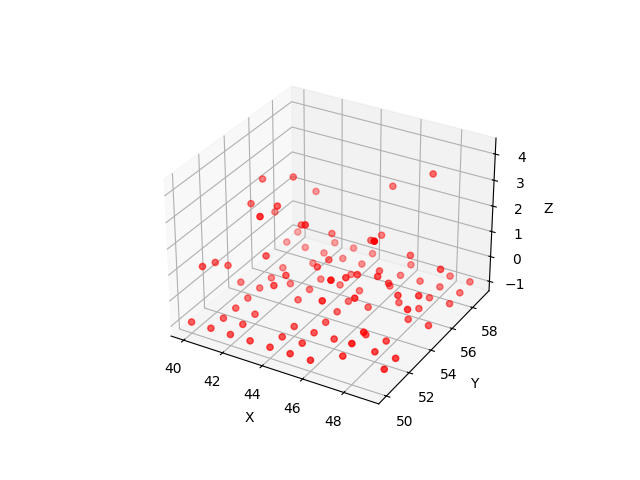

In [117]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

# Wykres punktowy 3D
ax.scatter(bad_square.points[:,0], bad_square.points[:,1], bad_square.points[:,2], c='r', marker='o')  # c - kolor,  marker - kształt punktoru

# Ustawianie etykiet osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Wyświetlenie wykresu
plt.show()

In [118]:
som = MiniSom(som_grid_size, som_grid_size, som_3dim, sigma=0.4, learning_rate=0.1 ,random_seed=42, neighborhood_function= "mexican_hat")
som.train(normal_vectors_to_train, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.1629079598378878


/home/repos/SOMPython/SOM_XYZ/Our_MiniSom/minisom.py:564: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


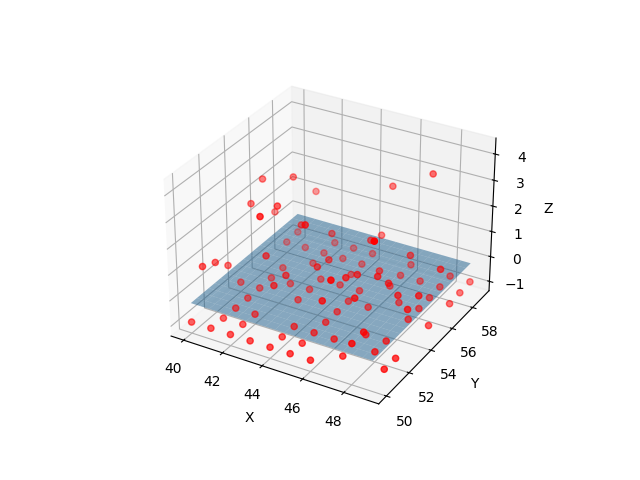

In [119]:
normal_x, normal_y, normal_Z = dataSet.bad_squares[0].normal_vector
centroid = bad_square.points.mean(axis=0)
# Create grid values
x = np.linspace(min(bad_square.points[:,0]), max(bad_square.points[:,0]),20) #x i y są zamienione miejscami ???
y = np.linspace(min(bad_square.points[:,1]), max(bad_square.points[:,1]),20)
xx, yy = np.meshgrid(x, y)
d = normal_x * centroid[0] + normal_y * centroid[1] + normal_Z * centroid[2]
# Calculate Z values
Z = (-normal_x * xx - normal_y * yy + d) / normal_Z

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bad_square.points[:,0], bad_square.points[:,1], bad_square.points[:,2], c='r', marker='o')  # c - kolor,  marker - kształt punktoru

ax.plot_surface(xx, yy, Z, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

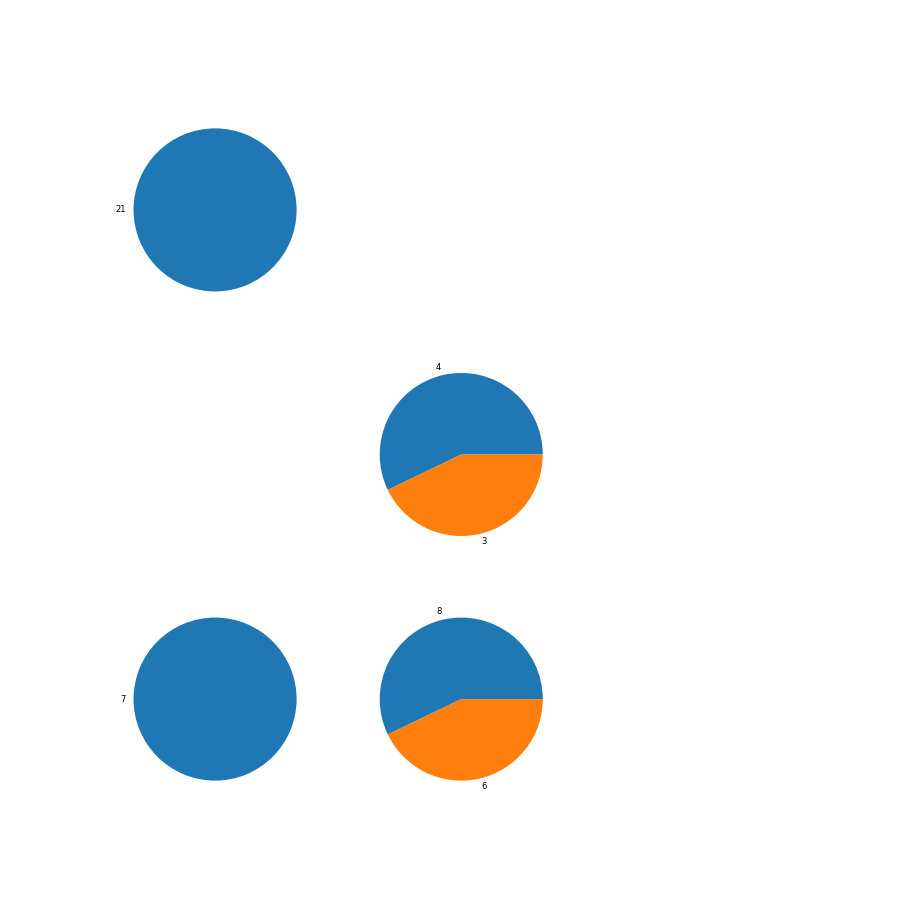

In [120]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(normal_vectors_to_train, [label_names[t] for t in labels])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(som_grid_size, som_grid_size, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[som_grid_size-1-position[1],
                         position[0]], aspect=1)
    patches, autotexts = plt.pie(label_fracs, textprops={'fontsize': 6})  # Change here

    # Add labels to show the counts
    for t, count in zip(autotexts, label_fracs):
        if count > 0:  # Only display the number if the count is greater than zero
            t.set_text(f"{count:.0f}") 

plt.legend(patches, label_names.values(), bbox_to_anchor=(5.5, 9.5), ncol=3)
plt.show()